# Análisis de Viajes Compartidos

## Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas

* Importar los archivos
* Estudiar los datos que contienen
* Asegurarte de que los tipos de datos sean correctos
* Identificar los 10 principales barrios en términos de finalización del    recorrido
* Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
* Sacar conclusiones basadas en cada gráfico y explicar los resultados

## Paso 5. Prueba de hipótesis (Python)

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué
¿Cómo será evaluado mi proyecto?
Estos son los criterios de evaluación del proyecto. Léelos atentamente antes de empezar a trabajar.

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns



In [2]:

# Número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017
trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')

# Promedio de viajes que terminaron en cada barrio de Chicago en noviembre de 2017
dropoff = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')

# Datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
loop = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv') 

## Preparar los Datos

In [3]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


tenemos que la columna 'start_ts' es de tipo objetivo se cambia al tipo date

In [9]:
loop['start_ts']=pd.to_datetime(loop['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [10]:
loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Verificar Datos Duplicados

In [11]:
trips.duplicated().sum()

0

In [12]:
dropoff.duplicated().sum()

0

In [13]:
loop.duplicated().sum()

197

In [14]:
loop[loop.duplicated()].head()

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0


In [15]:
loop=loop.drop_duplicates()

In [16]:
loop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


Se eliminan datos duplicados los 197 filas duplicadas quedando 871.

### Análisis exploratorio de datos:

In [17]:
trips.describe()
print(trips['trips_amount'].var())
print('La moda del número de viajes es:', trips['trips_amount'].mode()[0], 'y', trips['trips_amount'].mode()[1])


14533708.952132937
La moda del número de viajes es: 14 y 29


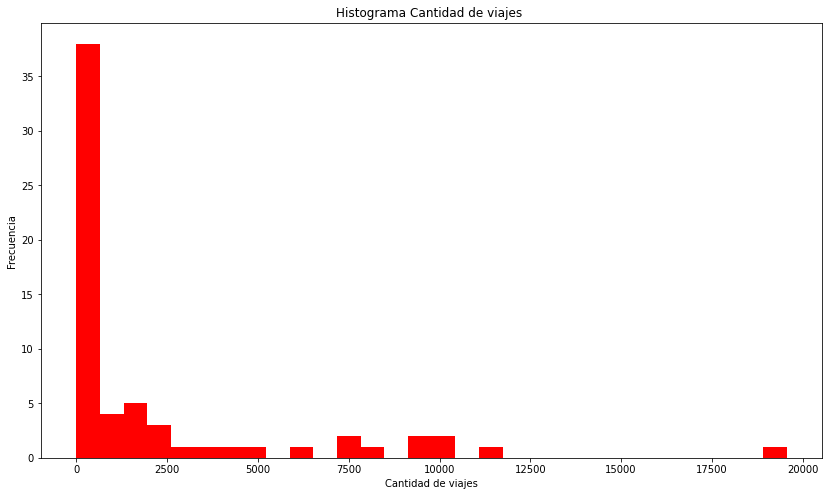

In [18]:
trips['trips_amount'].plot(kind='hist',bins= 30, color= 'red',figsize= [14,8])
plt.title('Histograma Cantidad de viajes ') 
plt.ylabel('Frecuencia') 
plt.xlabel('Cantidad de viajes')
plt.show()

Promedio y Desviación Estándar: El promedio de viajes por compañía es aproximadamente 2145, con una desviación estándar alta de alrededor de 3812. Esto indica una variabilidad considerable en la cantidad de viajes entre las diferentes compañías.

Rango de Datos: Los datos varían desde un mínimo de 2 viajes hasta un máximo de 19558 viajes, lo que muestra una amplia gama de valores.

Mediana: La mediana, que es el valor que divide el conjunto de datos en dos partes iguales, se sitúa en 178.5. Esto sugiere que la mitad de las compañías realizan menos de este número de viajes y la otra mitad realiza más.

Varianza y Sesgo: La varianza grande para la cantidad de viajes de cada compañía indica que los datos están dispersos alrededor de la media, posiblemente debido a la presencia de valores atípicos. La distribución de los datos muestra un sesgo hacia la derecha, ya que la media es significativamente mayor que la mediana.

Moda: Los números de viajes más frecuentes son 14 y 29, lo que indica los valores más comunes en el conjunto de datos.


In [19]:
print(dropoff['average_trips'].var())
dropoff.describe()

2939822.6331400108


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


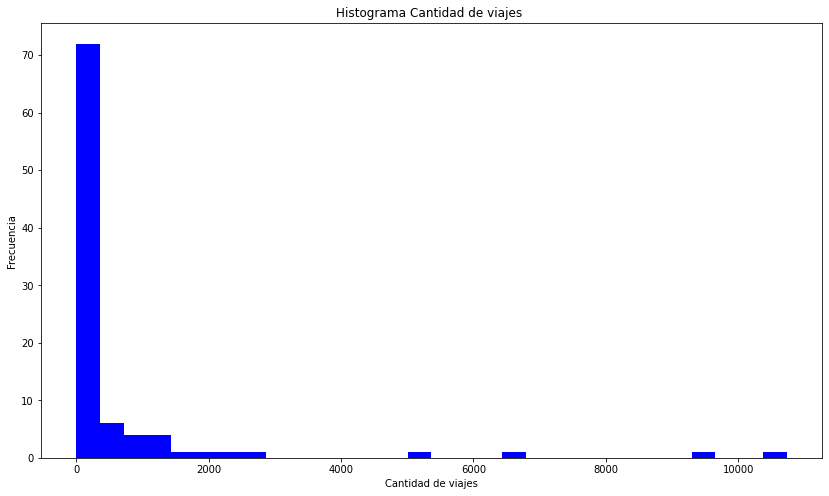

In [20]:
dropoff['average_trips'].plot(kind='hist',bins= 30, color= 'blue',figsize= [14,8])
plt.title('Histograma Cantidad de viajes ') 
plt.ylabel('Frecuencia') 
plt.xlabel('Cantidad de viajes')
plt.show()

Promedio y Desviación Estándar: El promedio de viajes es de alrededor de 599.95, con una desviación estándar significativa de aproximadamente 1714. Esto indica una amplia variabilidad en la cantidad de viajes entre los diferentes barrios.

Rango de Datos: Los datos oscilan desde un mínimo de 1.8 viajes hasta un máximo de 10727.47, lo que muestra una amplia gama de valores.

Mediana: La mediana se sitúa en 52.02, lo que indica que la mitad de los barrios tienen un promedio de viajes menor que este valor y la otra mitad tiene un promedio mayor.

Varianza y Sesgo: La varianza es muy grande (2939822.6) para el promedio de viajes que terminaron en cada barrio de Chicago, lo que indica que los datos están dispersos alrededor de la media. Esto sugiere la presencia de valores atípicos. La distribución de los datos muestra un sesgo hacia la derecha, ya que la media es significativamente mayor que la mediana.

In [21]:
print(loop['duration_seconds'].var())
print('La moda para la duración del viaje es:', loop['duration_seconds'].mode()[0])
loop.describe()

611953.7332435963
La moda para la duración del viaje es: 1260.0


,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


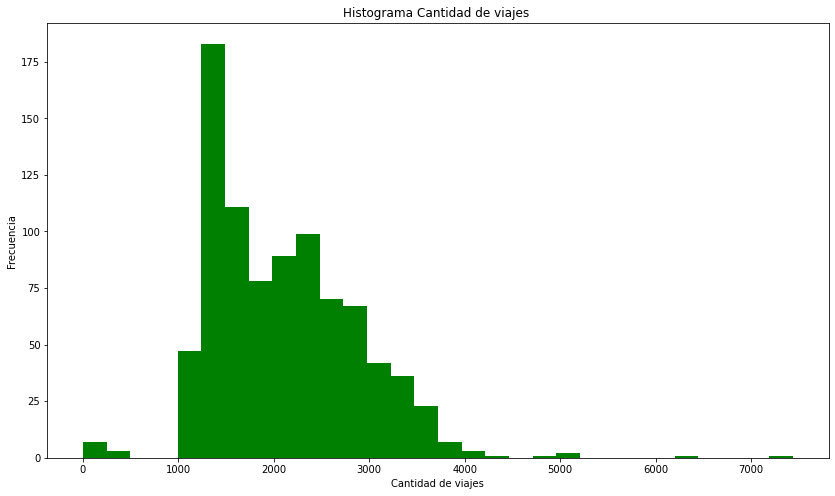

In [22]:
loop['duration_seconds'].plot(kind='hist',bins= 30, color= 'green',figsize= [14,8])
plt.title('Histograma Cantidad de viajes ') 
plt.ylabel('Frecuencia') 
plt.xlabel('Cantidad de viajes')
plt.show()

Promedio y Desviación Estándar: La duración promedio del viaje es de alrededor de 2071.73 segundos, con una desviación estándar moderada de aproximadamente 769.46. Esto indica una variabilidad moderada en la duración de los viajes.

Rango de Datos: Los tiempos de viaje varían desde 0 segundos hasta 7440 segundos, mostrando una amplia gama de valores.

Mediana: La mediana se sitúa en 1980 segundos, lo que sugiere que la mitad de los viajes tienen una duración menor que este valor y la otra mitad tiene una duración mayor. Esto indica una distribución relativamente uniforme de los tiempos de viaje en el conjunto de datos.

Varianza y Sesgo: La varianza es grande (611953.7) y la desviación estándar es de 769.46, lo cual indica que los datos están relativamente dispersos alrededor de la media. Esto puede sugerir la presencia de valores atípicos. La comparación entre la media y la mediana muestra que los valores son cercanos, pero el rango de valores extremos (0 y 7440) indica la posible presencia de datos atípicos.

Distribución de Datos: La distribución de los datos no es normal, ya que hay valores muy bajos y valores muy altos que afectan la media. Esto se puede observar en el histograma.

Moda: El valor de duración del viaje más frecuente es de 1260 segundos.


## Las 10  empresas de taxis y  barrios por número de finalizaciones

In [23]:
top10_barrios=dropoff.sort_values(by='average_trips', ascending=False).head(10)
top10_barrios

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


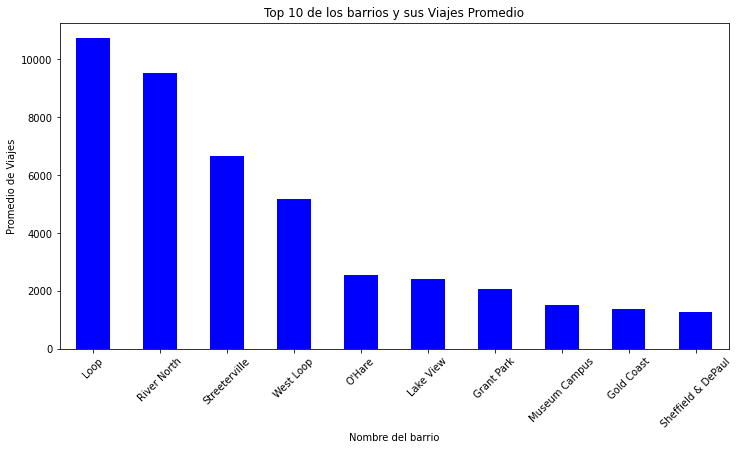

In [24]:
top10_barrios.plot(x= 'dropoff_location_name',y= 'average_trips',kind= 'bar',figsize= [12,6],color= 'blue',legend= False,rot= 45)
plt.title('Top 10 de los barrios y sus Viajes Promedio')
plt.xlabel('Nombre del barrio')
plt.ylabel('Promedio de Viajes')
                       
plt.show()

Dado que el promedio de viajes que terminaron principalmente en dos barrios de Chicago, Loop y River North, es alto, podemos inferir que Flash Cab y Taxi Affiliation Services probablemente realizaron la mayoría de sus viajes a estos barrios. Esto sugiere que estas compañías pueden tener una presencia significativa en estas áreas y podrían ser las opciones preferidas para los residentes o visitantes que viajan a esos destinos.


In [25]:
top10_companies=trips.sort_values(by='trips_amount',ascending=False).head(10)
top10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


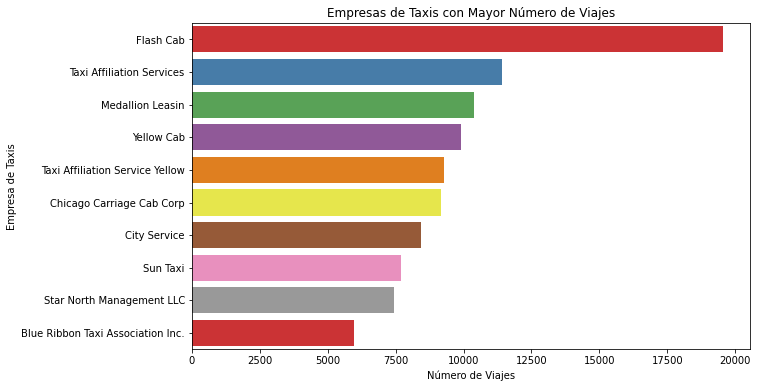

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_companies, x='trips_amount', y='company_name', palette='Set1')
plt.title('Empresas de Taxis con Mayor Número de Viajes')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.show()

Principales Compañías de Taxis: Las dos principales compañías con más viajes en los días 15 y 16 de noviembre de 2017 son Flash Cab y Taxi Affiliation Services, ya que realizaron más de 10,000 viajes en solo dos días. Esto indica que estas compañías son líderes en términos de volumen de viajes durante ese período.


# Prueba de Hipótesis

Primero, tomamos nuestros datos de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare y los dividimos en dos grupos: días con condiciones climáticas buenas y días con condiciones climáticas malas.

Luego, queremos saber si la duración promedio de los viajes es la misma en ambos grupos o si hay una diferencia significativa. Para hacer esto, realizamos una prueba estadística llamada prueba de Levene para verificar si las duraciones de los viajes tienen varianzas iguales o diferentes en ambos grupos.

Si la prueba de Levene muestra que las varianzas son iguales (lo que significa que la duración de los viajes varía de manera similar en días con condiciones climáticas buenas y malas), usamos un método estadístico llamado prueba t de Student para comparar las duraciones de los viajes en ambos grupos.

Si la prueba de Levene muestra que las varianzas son diferentes (lo que significa que la variabilidad en la duración de los viajes es diferente en días con condiciones climáticas buenas y malas), utilizamos una versión ajustada de la prueba t de Student que tiene en cuenta esta diferencia en la variabilidad.

Al realizar estas pruebas estadísticas, podemos determinar si existe una diferencia significativa en la duración promedio de los viajes entre días con condiciones climáticas buenas y malas.

In [27]:
loop_good = loop[loop['weather_conditions'] == 'Good']
loop_bad = loop[loop['weather_conditions'] == 'Bad']

In [28]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos
alpha= 0.05
results = st.levene(loop_good['duration_seconds'], loop_bad['duration_seconds'])

print('El valor p en el test de levene es:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p en el test de levene es: 0.9806770360671218
No se rechaza la hipótesis nula


In [29]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
results_duration = st.ttest_ind(loop_good['duration_seconds'], loop_bad['duration_seconds'])

print('El valor p es:', results_duration.pvalue)

if results_duration.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 7.397770692813604e-08
Se rechaza la hipótesis nula


In [30]:
#  promedio de duración con mean() para un buen clima
weather_good_seg = loop_good['duration_seconds'].mean()
weather_good_min = weather_good_seg / 60
print(f'La duración promedio en buenas condiciones climáticas son {round(weather_good_min)} minutos.')

La duración promedio en buenas condiciones climáticas son 34 minutos.


In [31]:
#  promedio de duración con mean() para un mal clima
weather_bad_seg = loop_bad['duration_seconds'].mean()
weather_bad_min = weather_bad_seg / 60
print(f'La duración promedio en malas condiciones climáticas son {round(weather_bad_min)} minutos.')

La duración promedio en malas condiciones climáticas son 40 minutos.


El resultado de nuestra prueba estadística sugiere que hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días con condiciones climáticas buenas y malas. Esto significa que el clima parece influir en la duración de los viajes de taxi entre estas dos ubicaciones.







Conclusión General

Los días 16 y 17 de noviembre fueron populares para los servicios de taxi, especialmente con las compañías Flash Cab y Taxi Affiliation Services, que registraron un alto número de viajes: 19558 y 11422, respectivamente.

Durante el mes de noviembre, el número promedio de viajes que terminaron principalmente en dos barrios de Chicago, Loop y River North, fue significativamente alto, con aproximadamente 10727.4 y 9523.6 viajes en promedio, respectivamente. Además, el Aeropuerto Internacional O'Hare ocupó el quinto lugar en el top 10 de barrios principales por número de finalizaciones de viajes.

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare difiere dependiendo de las condiciones climáticas. En promedio, los viajes durante días con condiciones climáticas buenas duraron alrededor de 34 minutos, mientras que durante días con condiciones climáticas malas duraron alrededor de 40 minutos.
